# TP Scoring

## Membres: Linsey Nkatouloulou & Guilhem Mobasso

In [1]:
#pip install pandas sas7bdat

## Librairies

In [34]:
import zipfile
import os
import pandas as pd
from sas7bdat import SAS7BDAT
import matplotlib.pyplot as plt
import seaborn as sns

## I- Préparation et analyse préliminaire du jeu de données

### Chargement du jeu de données

In [35]:
# Cette partie sert à unzip le fichier autorisations : ce fichier trop gros ne peut pas etre chargé directement sur Github

zip_file_path = 'data/autorisations.zip'
extraction_dir = 'data'
os.makedirs(extraction_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

extracted_files = os.listdir(extraction_dir)
extracted_files


['autorisations.sas7bdat', 'autorisations.zip']

In [36]:
file_path = 'data/autorisations.sas7bdat'
with SAS7BDAT(file_path) as file:
    data = file.to_data_frame()

In [37]:
# Aperçu du jeu de données

pd.options.display.max_columns = None
pd.options.display.max_rows = None

data.head(10)

,Carte,Pays,Date,Heure,dateheure,CodeRep,MCC,Montant,fraude,FM_Velocity_Condition_3,FM_Velocity_Condition_6,FM_Velocity_Condition_12,FM_Velocity_Condition_24,FM_Sum_3,FM_Sum_6,FM_Sum_12,FM_Sum_24,FM_Redondance_MCC_3,FM_Redondance_MCC_6,FM_Redondance_MCC_12,FM_Redondance_MCC_24,FM_Difference_Pays_3,FM_Difference_Pays_6,FM_Difference_Pays_12,FM_Difference_Pays_24
0,0.0,840,2003-12-02,17:47:52,2003-12-02,15,5812,69.25,0.0,0.0,0.0,0.0,0.0,69.25,69.25,69.25,69.25,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,158,2003-11-25,06:00:20,2003-11-25,15,5311,1.00,0.0,0.0,0.0,0.0,0.0,1.00,1.00,1.00,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2.0,826,2003-11-12,14:10:57,2003-11-12,15,5211,516.95,0.0,0.0,0.0,0.0,0.0,516.95,516.95,516.95,516.95,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,3.0,840,2003-11-07,03:41:55,2003-11-07,14,7399,0.01,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.01,0.01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,4.0,158,2003-11-23,05:07:03,2003-11-23,15,5311,1.00,0.0,0.0,0.0,0.0,0.0,1.00,1.00,1.00,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,5.0,158,2003-11-17,02:26:28,2003-11-17,15,5311,1.00,0.0,0.0,0.0,0.0,0.0,1.00,1.00,1.00,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,6.0,840,2003-12-03,02:52:14,2003-12-03,15,5969,48.46,0.0,0.0,0.0,0.0,0.0,48.46,48.46,48.46,48.46,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,6.0,840,2003-12-04,02:36:37,2003-12-04,15,5969,48.32,0.0,0.0,0.0,0.0,0.0,48.32,48.32,48.32,96.50,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
8,6.0,840,2003-12-05,02:46:17,2003-12-05,15,5969,48.32,0.0,0.0,0.0,0.0,0.0,48.32,48.32,48.32,48.32,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,6.0,840,2003-12-06,02:30:31,2003-12-06,15,5969,48.18,0.0,0.0,0.0,0.0,0.0,48.18,48.18,48.18,96.78,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0


In [38]:
data.dtypes

Carte                       float64
Pays                         object
Date                         object
Heure                        object
dateheure                    object
CodeRep                      object
MCC                          object
Montant                     float64
fraude                      float64
FM_Velocity_Condition_3     float64
FM_Velocity_Condition_6     float64
FM_Velocity_Condition_12    float64
FM_Velocity_Condition_24    float64
FM_Sum_3                    float64
FM_Sum_6                    float64
FM_Sum_12                   float64
FM_Sum_24                   float64
FM_Redondance_MCC_3         float64
FM_Redondance_MCC_6         float64
FM_Redondance_MCC_12        float64
FM_Redondance_MCC_24        float64
FM_Difference_Pays_3        float64
FM_Difference_Pays_6        float64
FM_Difference_Pays_12       float64
FM_Difference_Pays_24       float64
dtype: object

### Analyse exploratoire du jeu de données

In [39]:
# Informations sur le jeu de données

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151432 entries, 0 to 1151431
Data columns (total 25 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Carte                     1151432 non-null  float64
 1   Pays                      1151432 non-null  object 
 2   Date                      1151432 non-null  object 
 3   Heure                     1151432 non-null  object 
 4   dateheure                 1151432 non-null  object 
 5   CodeRep                   1151432 non-null  object 
 6   MCC                       1151432 non-null  object 
 7   Montant                   1151432 non-null  float64
 8   fraude                    1151432 non-null  float64
 9   FM_Velocity_Condition_3   1151432 non-null  float64
 10  FM_Velocity_Condition_6   1151432 non-null  float64
 11  FM_Velocity_Condition_12  1151432 non-null  float64
 12  FM_Velocity_Condition_24  1151432 non-null  float64
 13  FM_Sum_3                  1

• **Carte** = Le numero de carte

• **Date** = La date de la transaction

• **Montant** = Le montant de la transaction

• **Pays** = Le code du pays dans lequel la transaction a été réalisée

• **MCC** = Le code du commercant chez qui la transaction a été réalisée

• **CodeRep** = Code réponse de la demande d’autorisation : 00 = Accepté, les autres codes sont des refus

• **Fraude** = La variable fraude permet d’identifier les transactions frauduleuses

In [40]:
# Vérification de la présence de doublons

print(f'Nombre de doublons : {data.duplicated().sum()}')

Nombre de doublons : 0


In [41]:
# Contrôle des valeurs manquantes
print(f'Nombre de valeurs manquantes : {data.count().isna().sum()}')

Nombre de valeurs manquantes : 0


In [42]:
#data["FM_Redondance_MCC_6"].unique()

In [43]:
#data["FM_Redondance_MCC_3"].unique()

In [44]:
# Tableau récapitulatifs sur les modalités de chaques variables

data_dtypes = data.dtypes.reset_index().rename(columns={'index':'Champ',0:'Type'})
data_dtypes

for i in data.columns:
    data_dtypes.loc[data_dtypes['Champ']==i,'Modalités'] = str(sorted(data[i].unique().tolist()))
    data_dtypes.loc[data_dtypes['Champ']==i,'NbDistinctVal'] = data[i].nunique()
    
data_dtypes

,Champ,Type,Modalités,NbDistinctVal
0,Carte,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",198044.0
1,Pays,object,"['008', '012', '020', '028', '031', '032', '03...",167.0
2,Date,object,"[datetime.date(2003, 11, 1), datetime.date(200...",243.0
3,Heure,object,"['00:00:00', '00:00:01', '00:00:02', '00:00:03...",85697.0
4,dateheure,object,"[datetime.date(2003, 11, 1), datetime.date(200...",243.0
5,CodeRep,object,"['00', '02', '05', '07', '14', '15', '30', '41...",15.0
6,MCC,object,"['0000', '0001', '0004', '0100', '0596', '0741...",661.0
7,Montant,float64,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...",81202.0
8,fraude,float64,"[0.0, 1.0]",2.0
9,FM_Velocity_Condition_3,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",47.0


In [45]:
differences = data[data['FM_Redondance_MCC_3'] != data['FM_Redondance_MCC_6']]

print("Lignes où FM_Redondance_MCC_3 et FM_Redondance_MCC_6 sont différentes:")

differences.head()

Lignes où FM_Redondance_MCC_3 et FM_Redondance_MCC_6 sont différentes:


,Carte,Pays,Date,Heure,dateheure,CodeRep,MCC,Montant,fraude,FM_Velocity_Condition_3,FM_Velocity_Condition_6,FM_Velocity_Condition_12,FM_Velocity_Condition_24,FM_Sum_3,FM_Sum_6,FM_Sum_12,FM_Sum_24,FM_Redondance_MCC_3,FM_Redondance_MCC_6,FM_Redondance_MCC_12,FM_Redondance_MCC_24,FM_Difference_Pays_3,FM_Difference_Pays_6,FM_Difference_Pays_12,FM_Difference_Pays_24
61,49.0,826,2003-11-24,11:36:46,2003-11-24,15,5969,1.00,0.0,0.0,0.0,0.0,0.0,1.00,2.00,2.00,2.00,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0
62,49.0,826,2003-11-24,11:38:32,2003-11-24,15,5969,1.00,0.0,0.0,0.0,0.0,0.0,2.00,3.00,3.00,3.00,2.0,3.0,3.0,3.0,1.0,2.0,2.0,2.0
268,103.0,056,2004-03-20,06:48:13,2004-03-20,00,4722,593.06,0.0,1.0,2.0,2.0,2.0,593.06,558.77,558.77,558.77,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0
271,103.0,484,2004-03-31,21:49:51,2004-03-31,00,5970,227.39,0.0,1.0,2.0,2.0,2.0,227.39,233.33,233.33,233.33,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0
416,143.0,208,2004-06-01,20:23:37,2004-06-01,00,4784,61.85,0.0,1.0,2.0,2.0,2.0,61.85,149.07,149.07,149.07,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0


In [30]:
#data.columns = data.columns.str.lower()

pas de problème apparent dans les données : on peut commencer la premiere analyse exploratrice

### Formattage des variables

In [48]:
# Dictionnaire de conversion des types
conversion_dict = {'Carte': 'object', 'Pays': 'object', 'Date': 'datetime64[ns]', 'Heure': 'object', 'dateheure': 'datetime64[ns]',
                   'CodeRep': 'object', 'MCC': 'object', 'Montant': 'float64', 'fraude': 'object',
                   'FM_Velocity_Condition_3': 'int64', 'FM_Velocity_Condition_6': 'int64', 'FM_Velocity_Condition_12': 'int64',
                   'FM_Velocity_Condition_24': 'int64', 'FM_Sum_3': 'float64', 'FM_Sum_6': 'float64', 'FM_Sum_12': 'float64', 
                   'FM_Sum_24': 'float64', 'FM_Redondance_MCC_3': 'int64', 'FM_Redondance_MCC_6': 'int64', 
                   'FM_Redondance_MCC_12': 'int64', 'FM_Redondance_MCC_24': 'int64', 'FM_Difference_Pays_3': 'int64',
                   'FM_Difference_Pays_6': 'int64', 'FM_Difference_Pays_12': 'int64', 'FM_Difference_Pays_24': 'int64'}

# Application de la conversion
data = data.astype(conversion_dict)

data.dtypes

Carte                               object
Pays                                object
Date                        datetime64[ns]
Heure                               object
dateheure                   datetime64[ns]
CodeRep                             object
MCC                                 object
Montant                            float64
fraude                              object
FM_Velocity_Condition_3              int64
FM_Velocity_Condition_6              int64
FM_Velocity_Condition_12             int64
FM_Velocity_Condition_24             int64
FM_Sum_3                           float64
FM_Sum_6                           float64
FM_Sum_12                          float64
FM_Sum_24                          float64
FM_Redondance_MCC_3                  int64
FM_Redondance_MCC_6                  int64
FM_Redondance_MCC_12                 int64
FM_Redondance_MCC_24                 int64
FM_Difference_Pays_3                 int64
FM_Difference_Pays_6                 int64
FM_Differen

### II- Analyses descriptives univariées

In [53]:
# Tableau descriptifs des variables quantitatives

data.describe(percentiles=[.25,.50,.75]).round(2)

,Date,dateheure,Montant,FM_Velocity_Condition_3,FM_Velocity_Condition_6,FM_Velocity_Condition_12,FM_Velocity_Condition_24,FM_Sum_3,FM_Sum_6,FM_Sum_12,FM_Sum_24,FM_Redondance_MCC_3,FM_Redondance_MCC_6,FM_Redondance_MCC_12,FM_Redondance_MCC_24,FM_Difference_Pays_3,FM_Difference_Pays_6,FM_Difference_Pays_12,FM_Difference_Pays_24
count,1151432,1151432,1151432.00,1151432.00,1151432.00,1151432.00,1151432.00,1151432.00,1151432.00,1151432.00,1151432.00,1151432.00,1151432.00,1151432.00,1151432.00,1151432.00,1151432.00,1151432.00,1151432.00
mean,2004-03-07 13:38:38.092947840,2004-03-07 13:38:38.092947840,141.96,1.24,1.33,1.41,1.65,212.85,229.46,246.21,296.37,1.13,1.15,1.19,1.26,1.06,1.07,1.09,1.13
min,2003-11-01 00:00:00,2003-11-01 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,2004-01-06 00:00:00,2004-01-06 00:00:00,24.50,1.00,1.00,1.00,1.00,29.25,30.00,31.02,34.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
50%,2004-03-12 00:00:00,2004-03-12 00:00:00,48.34,1.00,1.00,1.00,1.00,61.19,65.10,68.93,79.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
75%,2004-05-08 00:00:00,2004-05-08 00:00:00,114.90,1.00,1.00,2.00,2.00,151.00,162.10,173.20,201.63,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
max,2004-06-30 00:00:00,2004-06-30 00:00:00,546382.20,46.00,81.00,110.00,129.00,546382.20,546382.20,546382.20,546500.70,39.00,39.00,46.00,59.00,10.00,15.00,15.00,17.00
std,NaN,NaN,678.27,0.91,1.18,1.45,2.09,1474.47,1511.74,1556.26,2253.86,0.64,0.75,0.99,1.52,0.28,0.34,0.39,0.52


In [55]:
print(f'Répartition variable "{"fraude"}":')
data[["fraude"]].value_counts(normalize=False)

Répartition variable "fraude":


fraude
0.0       1144186
1.0          7246
Name: count, dtype: int64

In [56]:
#Graphique pie plot pour les variables qualitatives

def pie_plot(df, var_list):
    # Couleurs bleues et violettes
    colors = ['#1f77b4', '#9467bd']

    for var in var_list:
        # Comptage du nombre de chaque modalité
        counts = df[var].value_counts()

        # Calcul du pourcentage de chaque modalité
        percentages = (counts / counts.sum()) * 100

        # Séparation de la première tranche de notre camembert du reste
        explode = (0.1, 0)

        # Création de notre graphique camembert
        plt.figure(figsize=(6, 6))
        plt.pie(percentages, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)

        # Peauffinage et affichage de notre graphique
        plt.title(f"Répartition de la variable {var}")
        plt.axis('equal')
        plt.show()

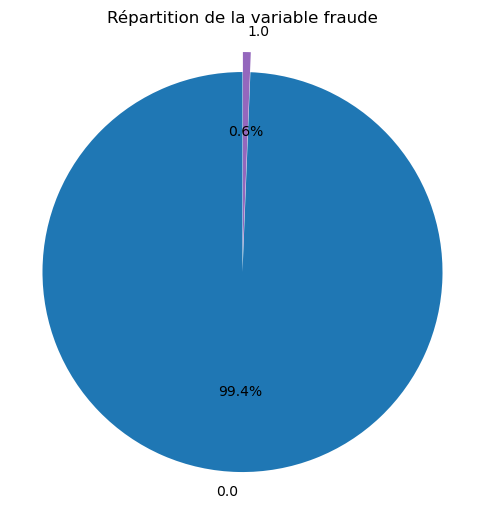

In [57]:
#Liste des variables binaires 
pie_vars_list = ["fraude"]
pie_plot(data, pie_vars_list)

In [60]:
# Calcul du pourcentage de fraude par pays
fraude_par_pays = data.groupby('Pays')['fraude'].agg(['sum', 'count'])
fraude_par_pays['pourcentage_fraude'] = (fraude_par_pays['sum'] / fraude_par_pays['count']) 

# Renommer les colonnes pour plus de clarté
fraude_par_pays.rename(columns={'sum': 'nombre_de_fraudes', 'count': 'nombre_total'}, inplace=True)


In [61]:
fraude_par_pays

,nombre_de_fraudes,nombre_total,pourcentage_fraude
Pays,,,
008,0.0,2,0.0
012,0.0,373,0.0
020,14.0,5499,0.002546
028,1.0,211,0.004739
031,0.0,29,0.0
032,23.0,2591,0.008877
036,221.0,7996,0.027639
040,69.0,2878,0.023975
044,0.0,312,0.0


FRAUDE PAR PAYS

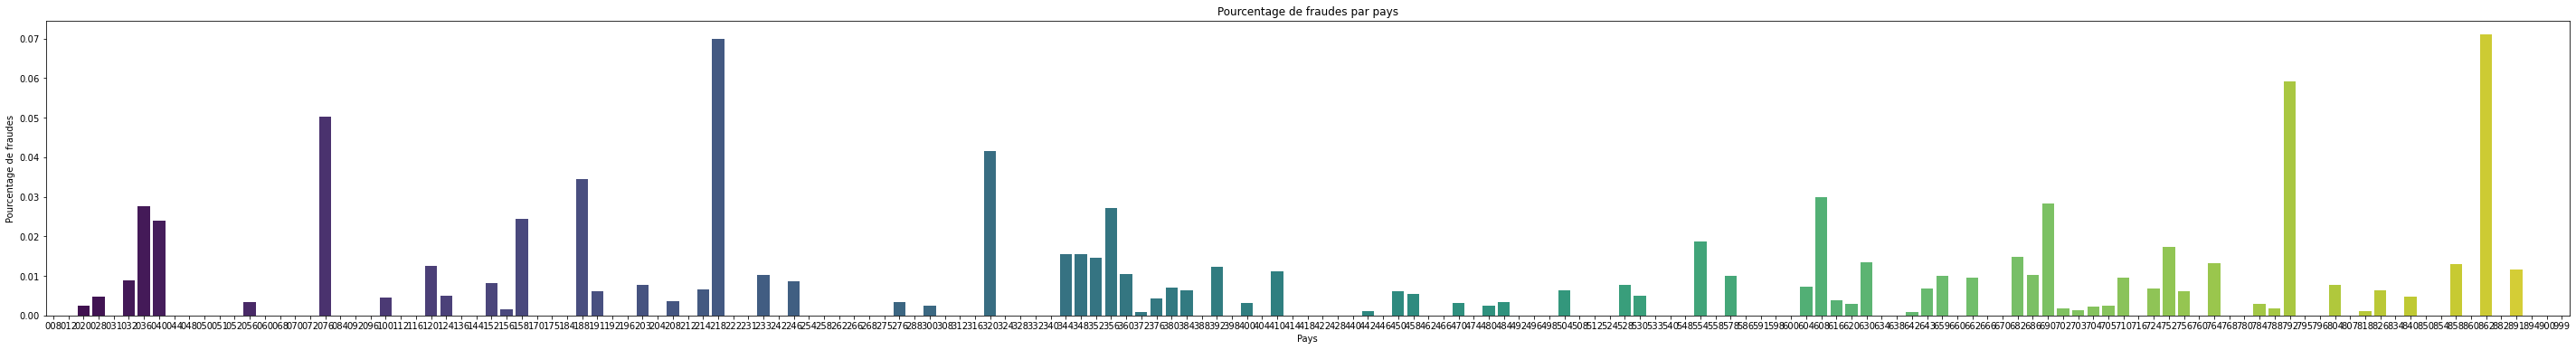

In [81]:
# Créer l'histogramme
plt.figure(figsize=(50, 6))
sns.barplot(x=fraude_par_pays.index, y=fraude_par_pays['pourcentage_fraude'], palette='viridis')

# Ajouter des labels et un titre
plt.xlabel('Pays')
plt.ylabel('Pourcentage de fraudes')
plt.title('Pourcentage de fraudes par pays')

# Afficher le graphique
plt.show()


certains pays n'ont subi aucune fraude sur la période

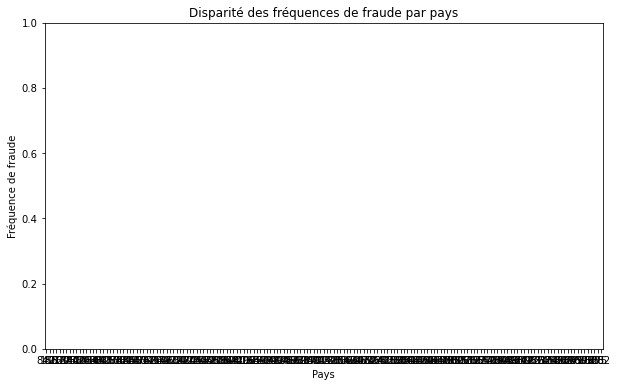

In [15]:
# columns = ["dateheure"] 
# data = data.drop(columns, axis=1)